In [3]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({'font.size': 13})

In [4]:
green_prices = np.load('green_prices.txt.npy')
auction_times = np.load('auction_times.txt.npy')
auction_times = auction_times / 86400
green_supply = np.load('green_supply.txt.npy')
num_queued_jobs = np.load('num_queued_jobs.txt.npy')
brown_avg_price = np.load('brown_avg_price.txt.npy')
green_usage = np.load('green_usage.txt.npy')
brown_usage = np.load('brown_usage.txt.npy')

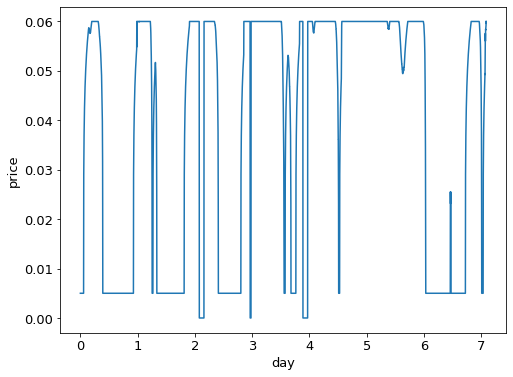

In [15]:
plt.figure(figsize=(8,6))
plt.plot(auction_times, green_prices)
plt.xlabel('day')
plt.ylabel('price')
# plt.title('Green Price Per Min')
plt.savefig('comb_green_price.png')
plt.show()

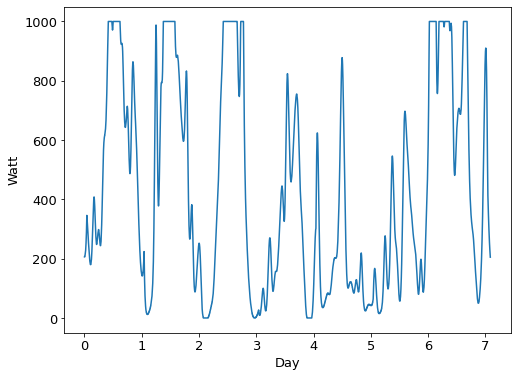

In [6]:
plt.figure(figsize=(8,6))
plt.plot(auction_times, green_supply)
plt.xlabel('Day')
plt.ylabel('Watt')
# plt.title('Green Power Supply')
# plt.savefig('combined_power.png')
plt.show()

In [7]:
# num_minutes_exceeded = np.arange(0, 30)
# disutility_low = 0.01 * np.log(num_minutes_exceeded + np.e)
# disutility_mid = 0.1 + 0.01 * num_minutes_exceeded
# disutility_high = 1 + 0.05*num_minutes_exceeded*num_minutes_exceeded

# plt.figure(figsize=(8,6))
# plt.plot(disutility_low, label='low priority')
# plt.plot(disutility_mid, label='mid priority')
# # plt.plot(disutility_high, label='high priority')
# plt.xlabel('Minutes Exceeding Ideal completion')
# plt.ylabel('Marginal Disutility')
# plt.legend()
# plt.title('Low + Mid Disutility Curves')
# plt.savefig('low_mid_disutility.png')
# plt.show()

In [8]:
def solar_gen(time):
	day_time = time % 86400
	# assume 6am to 8pm sunlight
	if day_time < 6*3600 or day_time > 20*3600:
		return 0

	peak = 1000 # watts

	hour_day = day_time / 3600.
	power = -1*(hour_day - 4)*(hour_day-20)
	power *= (peak / 64)

In [9]:
power = []
start = 0
solar_gen(start)

0

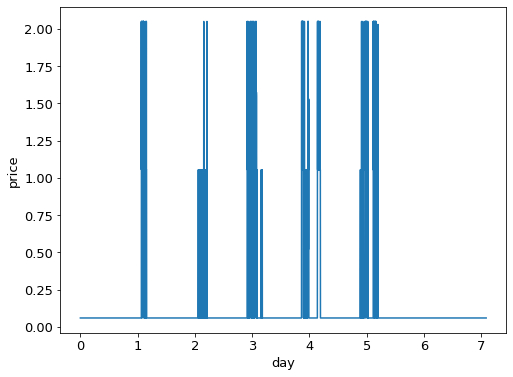

In [16]:
plt.figure(figsize=(8,6))
plt.plot(auction_times, brown_avg_price)
plt.xlabel('day')
plt.ylabel('price')
# plt.title('Brown Price Per Min')
plt.savefig('comb_brown_price.png')
plt.show()

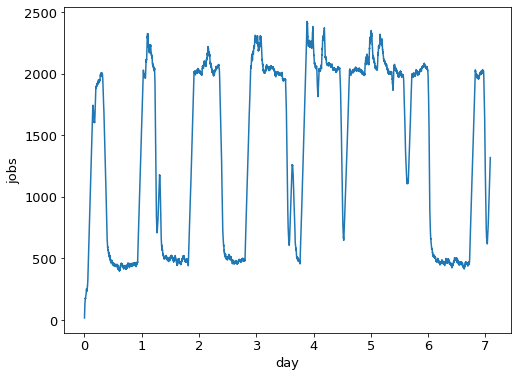

In [17]:
plt.figure(figsize=(8,6))
plt.plot(auction_times, num_queued_jobs)
plt.xlabel('day')
plt.ylabel('jobs')
# plt.title('Number of Queued Jobs')
plt.savefig('comb_num_queued_jobs.png')
plt.show()

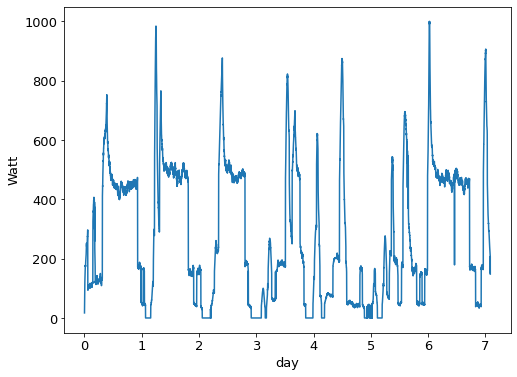

In [22]:
plt.figure(figsize=(8,6))
plt.plot(auction_times, green_usage)
plt.xlabel('day')
plt.ylabel('Watt')
# plt.title('Number of Queued Jobs')
plt.savefig('comb_energy_usage.png')
plt.show()

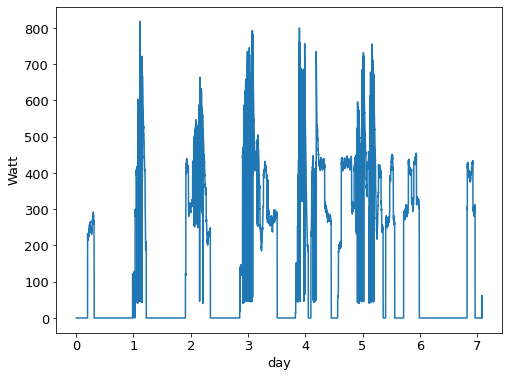

In [21]:
plt.figure(figsize=(8,6))
plt.plot(auction_times, brown_usage)
plt.xlabel('day')
plt.ylabel('Watt')
# plt.title('Number of Queued Jobs')
plt.savefig('comb_brown_usage.png')
plt.show()

In [9]:
solar = np.loadtxt('data/solarpower.txt', skiprows=1)
wind = np.loadtxt('data/windpower.txt', skiprows=1)


In [11]:
left = 214500
right = 235000

combined = solar[left:right]*1000 + wind[left:right]*(1000/3)
combined = np.minimum(combined, 1000)
solar_frac = solar[left:right]*1000
wind_frac = wind[left:right]*(1000/3)

Text(0, 0.5, 'Watts')

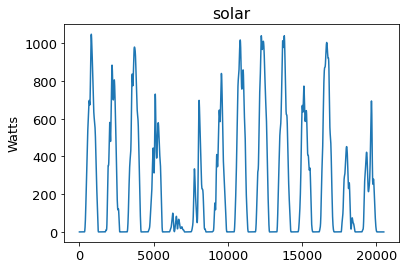

In [12]:
plt.plot(solar_frac)
plt.title('solar')
plt.ylabel('Watts')

Text(0, 0.5, 'watts')

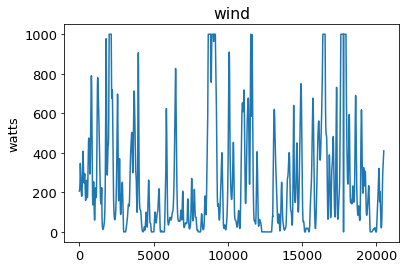

In [13]:
plt.plot(wind_frac)
plt.title('wind')
plt.ylabel('watts')

Text(0.5, 1.0, 'combined renewable')

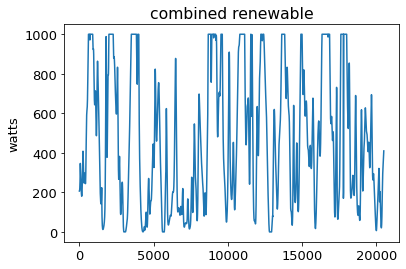

In [14]:
plt.plot(combined)
plt.ylabel('watts')
plt.title('combined renewable')

In [15]:
np.savetxt('data/solar_fraction_raw_energy.txt', solar_frac)
np.savetxt('data/wind_fraction_raw_energy.txt', wind_frac)
np.savetxt('data/combined_energy.txt', combined)